In [1]:
import os
for dirname, _, filenames in os.walk('/root/notebooks'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
import os
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

2024-11-22 17:50:15.796581: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
Eczema_dir = r'/root/notebooks/IMG_CLASSES/1. Eczema 1677'
Warts_Molluscum_and_other_Viral_Infections_dir = r'/root/notebooks/IMG_CLASSES/10. Warts Molluscum and other Viral Infections - 2103'

Atopic_Dermatitis_dir = r'/root/notebooks/IMG_CLASSES/3. Atopic Dermatitis - 1.25k'
Melanocytic_Nevi_dir = r'/root/notebooks/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970'
Psoriasis_pictures_Lichen_Planus_and_related_diseases_dir = r'/root/notebooks/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k'
Seborrheic_Keratoses_and_other_Benign_Tumors_dir = r'/root/notebooks/IMG_CLASSES/8. Seborrheic Keratoses and other Benign Tumors - 1.8k'
Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_dir = r'/root/notebooks/IMG_CLASSES/9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k'

filepaths = []
labels = []
dict_list = [Eczema_dir, Warts_Molluscum_and_other_Viral_Infections_dir, Atopic_Dermatitis_dir, Melanocytic_Nevi_dir,Psoriasis_pictures_Lichen_Planus_and_related_diseases_dir ,Seborrheic_Keratoses_and_other_Benign_Tumors_dir ,Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_dir]
class_labels = ['Eczema', 'Warts Molluscum and other Viral Infections', 'Atopic Dermatitis','Melanocytic Nevi', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors','Tinea Ringworm Candidiasis and other Fungal Infections']

for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
skin_data = pd.concat([Fseries, Lseries], axis=1)
skin_df = pd.DataFrame(skin_data)
print(skin_df.head())
print(skin_df["labels"].value_counts())

                                           filepaths  labels
0  /root/notebooks/IMG_CLASSES/1. Eczema 1677/v-s...  Eczema
1  /root/notebooks/IMG_CLASSES/1. Eczema 1677/1_8...  Eczema
2  /root/notebooks/IMG_CLASSES/1. Eczema 1677/v-e...  Eczema
3  /root/notebooks/IMG_CLASSES/1. Eczema 1677/t-s...  Eczema
4  /root/notebooks/IMG_CLASSES/1. Eczema 1677/t-e...  Eczema
Melanocytic Nevi                                          7970
Warts Molluscum and other Viral Infections                2103
Psoriasis pictures Lichen Planus and related diseases     2055
Seborrheic Keratoses and other Benign Tumors              1847
Tinea Ringworm Candidiasis and other Fungal Infections    1702
Eczema                                                    1678
Atopic Dermatitis                                         1257
Name: labels, dtype: int64


In [4]:
skin_df.shape

(18612, 2)

In [5]:
train_images, test_images = train_test_split(skin_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(skin_df, test_size=0.2, random_state=42)

In [6]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(14889, 2)
(5584, 2)
(3723, 2)
(13028, 2)


In [7]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 14888 validated image filenames belonging to 7 classes.
Found 5584 validated image filenames belonging to 7 classes.
Found 3723 validated image filenames belonging to 7 classes.


In [8]:
classes=list(train.class_indices.keys())
print (classes)

['Atopic Dermatitis', 'Eczema', 'Melanocytic Nevi', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Warts Molluscum and other Viral Infections']


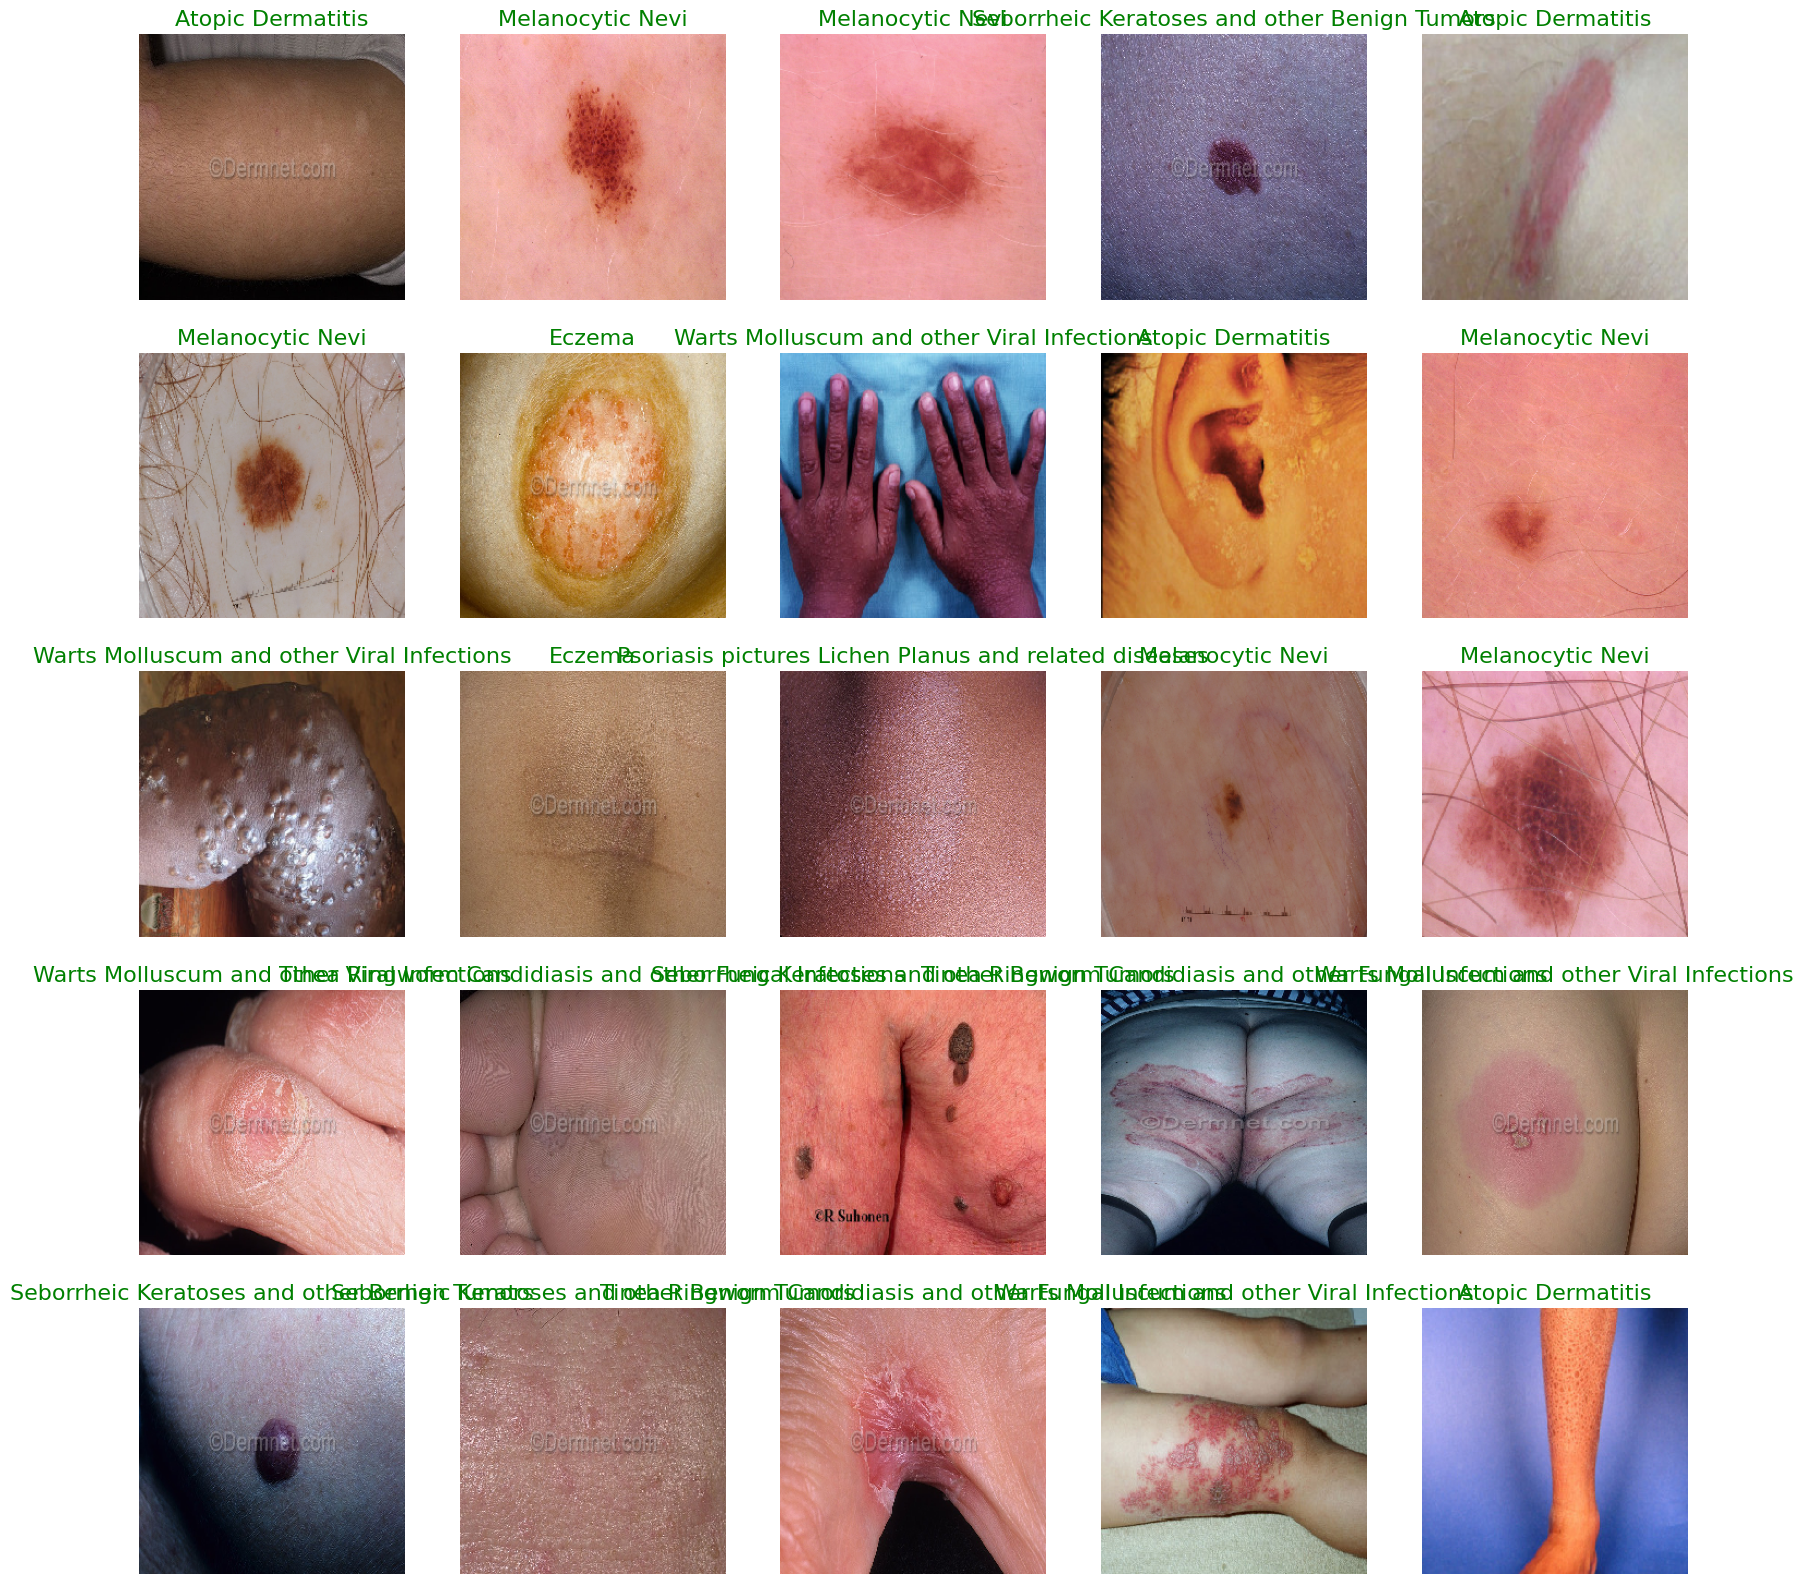

In [9]:
def show_Skin_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()
show_Skin_images(train)

In [10]:
num_classes = len(classes)

In [11]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build a new model on top of the pre-trained base
def build_transfer_learning_model(num_classes):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Build the transfer learning model
transfer_learning_model = build_transfer_learning_model(num_classes)

# Learning rate schedule callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history_transfer_learning = transfer_learning_model.fit(train, epochs=15, validation_data=val, callbacks=[reduce_lr])

# Evaluate on the test set
test_loss, test_accuracy = transfer_learning_model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

2024-11-22 17:50:21.531798: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31136 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:1d:00.0, compute capability: 7.0


9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/15


2024-11-22 17:50:25.339305: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-11-22 17:50:27.860657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2024-11-22 17:50:28.847453: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x559cf76f1ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-22 17:50:28.847500: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2024-11-22 17:50:28.887656: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-22 17:50:29.258538

466/466 [==============================] - ETA: 0s - loss: 0.9399 - accuracy: 0.6394

2024-11-22 17:51:36.759213: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


466/466 [==============================] - 89s 182ms/step - loss: 0.9399 - accuracy: 0.6394 - val_loss: 0.7859 - val_accuracy: 0.6967 - lr: 0.0010
Epoch 2/15
466/466 [==============================] - 83s 178ms/step - loss: 0.7951 - accuracy: 0.6916 - val_loss: 0.7407 - val_accuracy: 0.7121 - lr: 0.0010
Epoch 3/15
466/466 [==============================] - 82s 177ms/step - loss: 0.7410 - accuracy: 0.7144 - val_loss: 0.7050 - val_accuracy: 0.7298 - lr: 0.0010
Epoch 4/15
466/466 [==============================] - 82s 176ms/step - loss: 0.7014 - accuracy: 0.7307 - val_loss: 0.6988 - val_accuracy: 0.7378 - lr: 0.0010
Epoch 5/15
466/466 [==============================] - 81s 174ms/step - loss: 0.6636 - accuracy: 0.7474 - val_loss: 0.6755 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 6/15
466/466 [==============================] - 82s 177ms/step - loss: 0.6239 - accuracy: 0.7644 - val_loss: 0.6654 - val_accuracy: 0.7510 - lr: 0.0010
Epoch 7/15
466/466 [==============================] - 83s 177ms

2024-11-22 18:11:08.867153: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


175/175 [==============================] - 25s 145ms/step - loss: 0.4948 - accuracy: 0.8381
Test Accuracy: 83.81%


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 2,917,447
Trainable params: 659,463
Non-tr

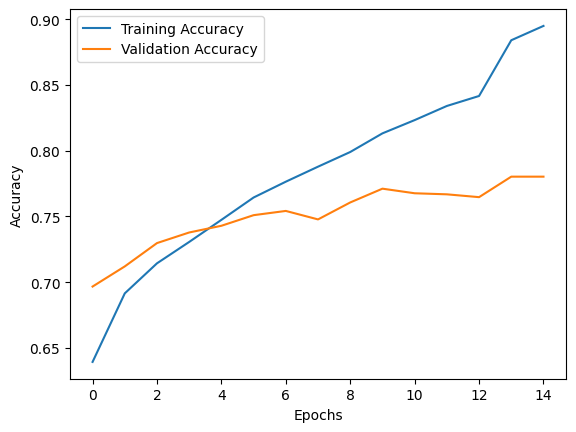

In [12]:
transfer_learning_model.summary()
plt.plot(history_transfer_learning.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer_learning.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

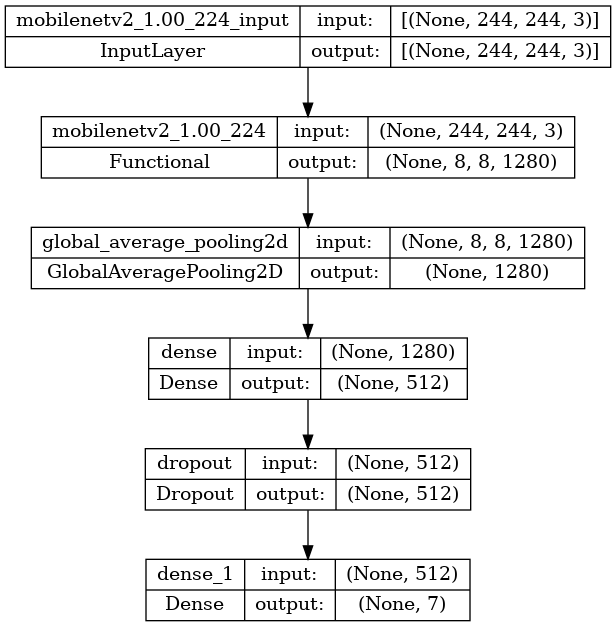

In [13]:
from keras.utils import plot_model
plot_model(transfer_learning_model, to_file='transfer_learning_model_plot.png', show_shapes=True, show_layer_names=True)


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
pred2 = transfer_learning_model.predict(test)
y_pred = np.argmax(pred2, axis=1)
y_true = test.labels
print(classification_report(y_true, y_pred))
accuracy = accuracy_score(y_true, y_pred) * 100
print("Accuracy of the Model: {:.1f}%".format(accuracy))

2024-11-22 18:11:34.978155: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


175/175 [==============================] - 26s 142ms/step
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       381
           1       0.68      0.69      0.68       500
           2       1.00      1.00      1.00      2381
           3       0.69      0.68      0.68       637
           4       0.81      0.77      0.79       553
           5       0.73      0.71      0.72       512
           6       0.76      0.76      0.76       620

    accuracy                           0.84      5584
   macro avg       0.76      0.76      0.76      5584
weighted avg       0.84      0.84      0.84      5584

Accuracy of the Model: 83.8%


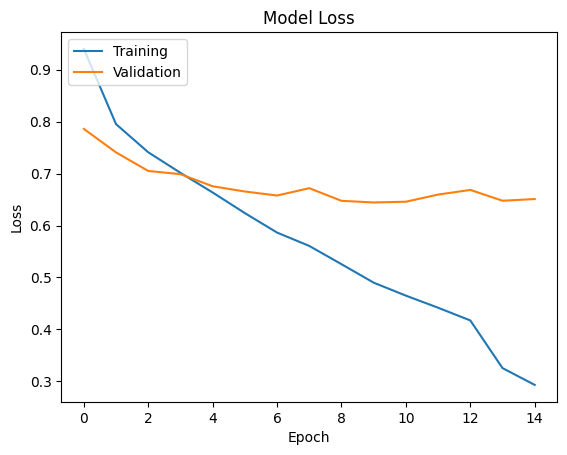

In [15]:
plt.plot(history_transfer_learning.history['loss'])
plt.plot(history_transfer_learning.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

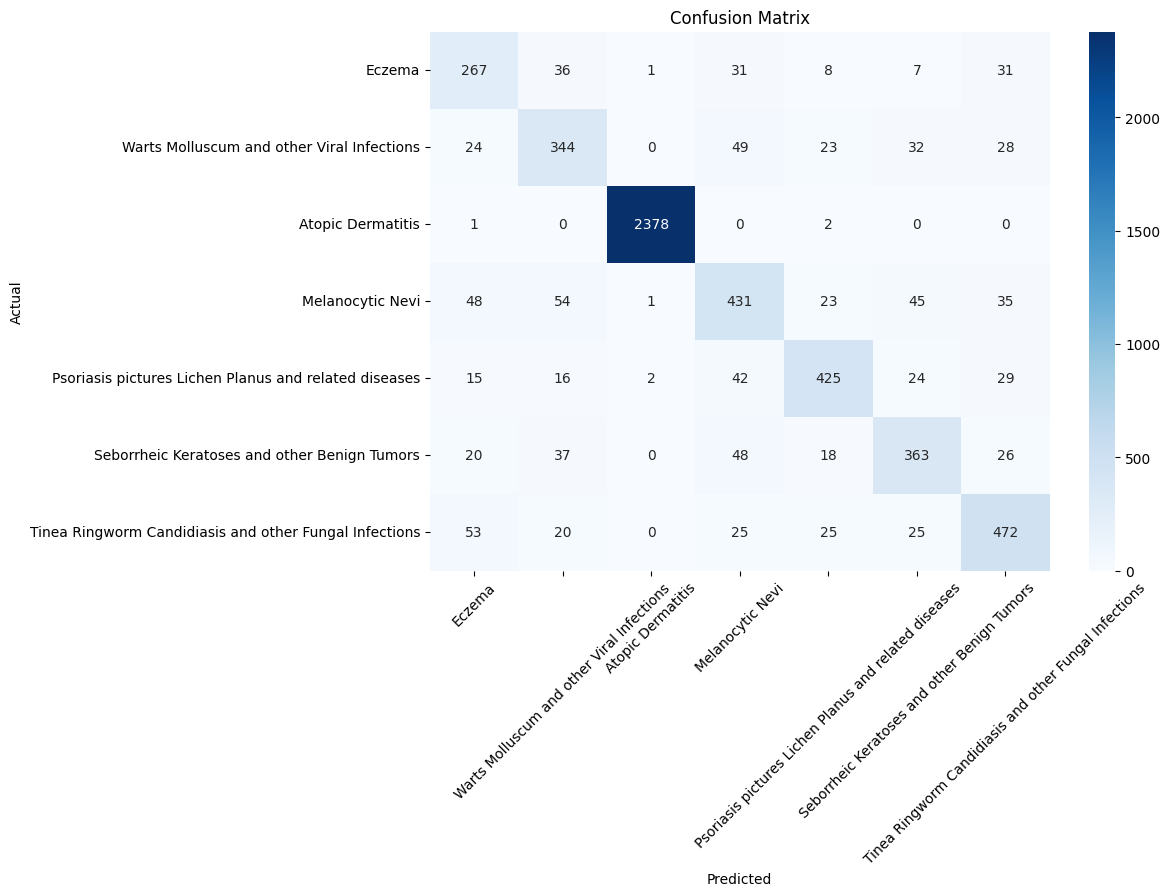

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_labels = ['Eczema', 'Warts Molluscum and other Viral Infections', 'Atopic Dermatitis', 'Melanocytic Nevi', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors','Tinea Ringworm Candidiasis and other Fungal Infections']

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Set ticks at the center of each class
tick_positions = [i + 0.5 for i in range(len(class_labels))]
plt.xticks(ticks=tick_positions, labels=class_labels, rotation=45)
plt.yticks(ticks=tick_positions, labels=class_labels, rotation=0)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()


In [17]:
transfer_learning_model.save("SKIN Diseases.h5")